In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("Problem Statement 4.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.shape

(4340, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
data['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [9]:
data_copy = data.copy(deep = True)
data_copy[['year','selling_price']] = data_copy[['year','selling_price']].replace(0,np.NaN)

In [10]:
data_copy.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
data['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [12]:
data['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

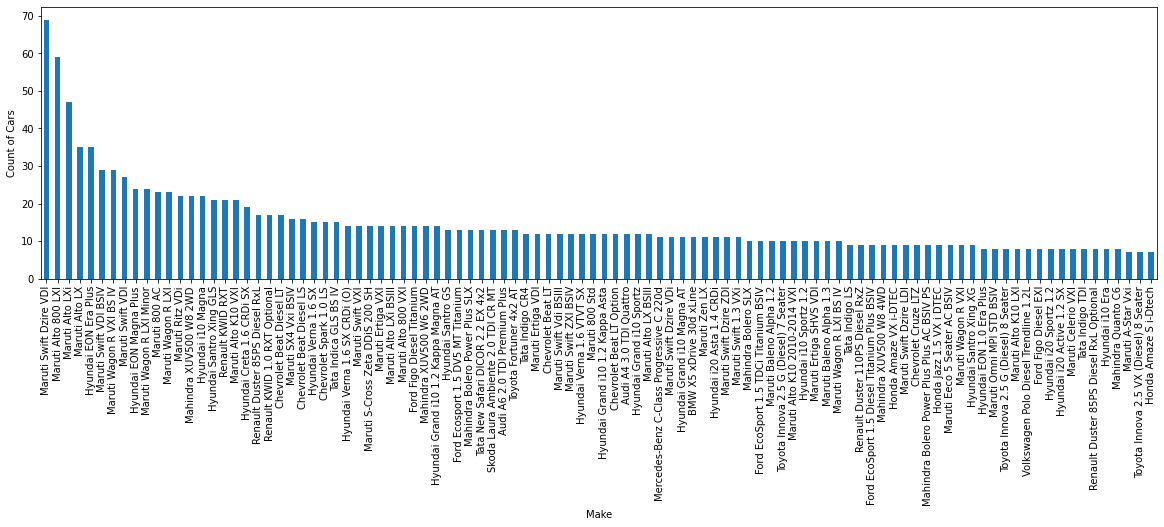

In [13]:
plt.figure(figsize=(20,5))
data.name.value_counts().head(100).plot.bar()
plt.xlabel('Make')
plt.ylabel('Count of Cars')
plt.show()

In [14]:
# Finding share holding of cars brand in selling 

rev = pd.DataFrame(data.groupby(['name'])['selling_price'].sum()).reset_index()
rev.columns = ['name','selling_price']
rev['Percent'] = round(rev['selling_price']/(rev['selling_price'].sum())*100,2)
display (rev.sort_values(['selling_price'], ascending=0))

,name,selling_price,Percent
39,BMW X5 xDrive 30d xLine,54450000,2.49
1079,Mercedes-Benz C-Class Progressive C 220d,41800000,1.91
971,Maruti Swift Dzire VDI,35290998,1.61
1389,Toyota Fortuner 4x2 AT,32995000,1.51
6,Audi A4 3.0 TDI Quattro,18960000,0.87
...,...,...,...
1285,Tata Nano Std,40000,0.00
1128,OpelCorsa 1.4 GL,35000,0.00
1286,Tata Nano Std BSII,35000,0.00
253,Ford Ikon 1.4 ZXi,22000,0.00


In [15]:
data["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [16]:
data["seller_type"].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [17]:
data["owner"].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

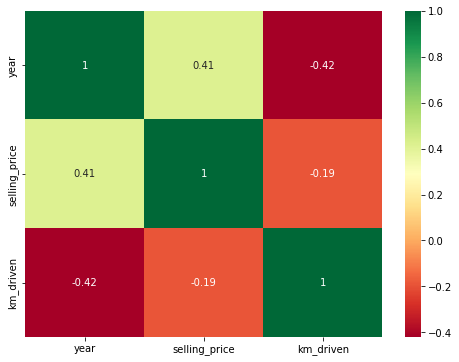

In [18]:
plt.figure(figsize=(8,6))
x=sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

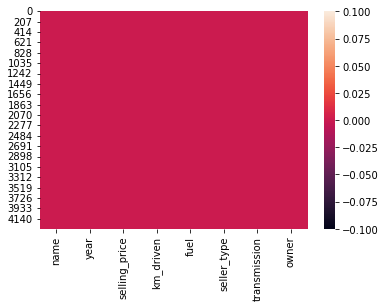

In [19]:
sns.heatmap(data.isnull())
plt.show()

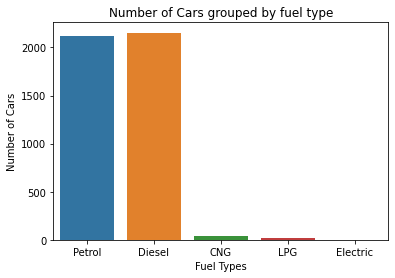

In [20]:
sns.countplot(data=data,x=data["fuel"])
plt.title('Number of Cars grouped by fuel type')
plt.ylabel('Number of Cars')
plt.xlabel('Fuel Types')
plt.show();

C:\Users\Ramakrishna\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


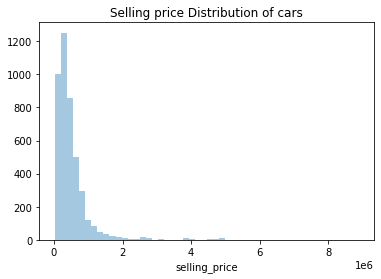

In [21]:
sns.distplot(data.selling_price, kde=False)
plt.title('Selling price Distribution of cars')
plt.show();

<AxesSubplot:xlabel='seller_type', ylabel='count'>

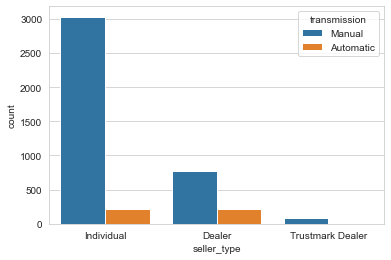

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='seller_type',hue='transmission',data=data)

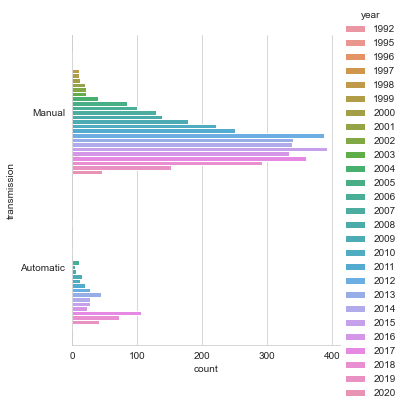

In [23]:
sns.catplot(y="transmission", hue="year", kind="count",
            data=data)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

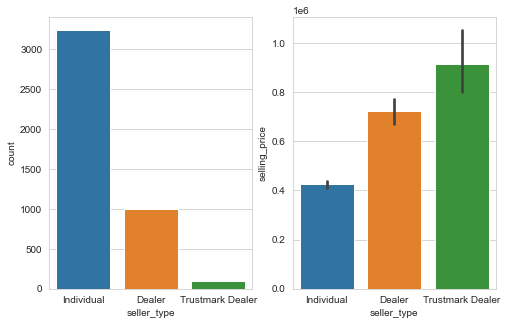

In [24]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (8,5))
sns.countplot(x="seller_type", data=data, ax=axis1)
sns.barplot(x="seller_type", y="selling_price",data=data, ax=axis2) 

<AxesSubplot:xlabel='owner', ylabel='km_driven'>

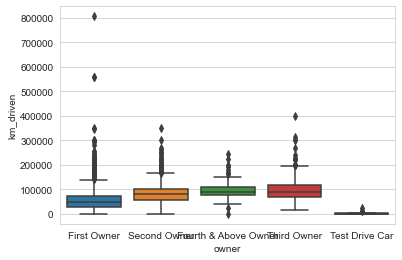

In [25]:
sns.boxplot(x="owner", y="km_driven", data=data)

<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

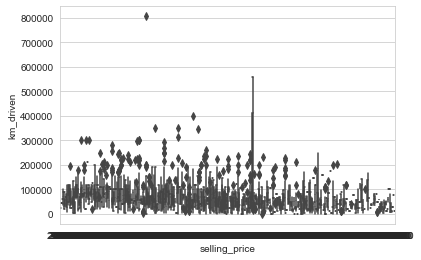

In [26]:
sns.boxplot(x="selling_price", y="km_driven", data=data)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

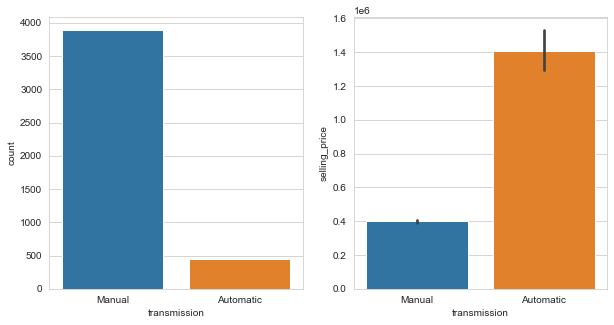

In [27]:
Fig, (axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x="transmission",data=data,ax=axis1)
sns.barplot(x="transmission",y="selling_price",data=data,ax=axis2)

In [28]:
#  Number of manual cars being sold is more than automatic, but automatic cars sells at a higher price

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

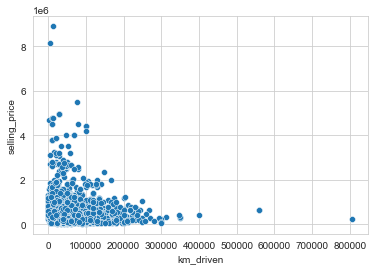

In [29]:
sns.scatterplot(data=data,x="km_driven",y="selling_price")

<AxesSubplot:xlabel='seller_type,owner,transmission'>

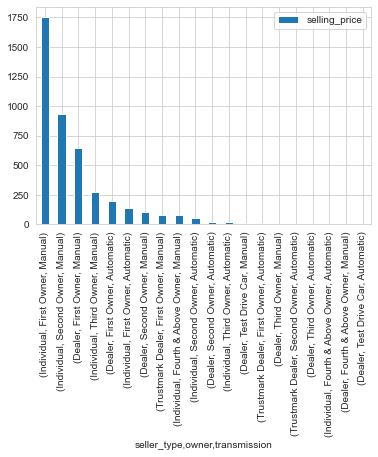

In [30]:
df_seller_owner = data.groupby(by=["seller_type","owner","transmission"])
df_seller_owner.count().sort_values(by="selling_price", ascending=False).plot(kind="bar", y="selling_price")

In [31]:
data["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [32]:
#Encoding Fuel Type Column
data.replace({"fuel":{"Diesel":0,"Petrol":1,"CNG":2,"LPG":3,"Electric":4}},inplace=True)

In [33]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [34]:
data.replace({"seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2}},inplace=True)

In [35]:
data.replace({"transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [36]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [37]:
data.replace({"owner":{"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3,"Test Drive Car":4}},inplace=True)

In [38]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [39]:
X=data.iloc[:,3:7].values

In [40]:
Y=data.iloc[:,2:3].values

In [41]:
print(Y)

[[ 60000]
 [135000]
 [600000]
 ...
 [110000]
 [865000]
 [225000]]


In [42]:
print(X)

[[ 70000      1      0      0]
 [ 50000      1      0      0]
 [100000      0      0      0]
 ...
 [ 83000      1      0      0]
 [ 90000      0      0      0]
 [ 40000      1      0      0]]


In [43]:
X.shape

(4340, 4)

In [44]:
Y.shape

(4340, 1)

In [45]:
#Split data into train and test
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3472, 4)
(868, 4)
(3472, 1)
(868, 1)


In [49]:
#loading linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
r2_score = lr.score(x_test,y_test)
print(r2_score)


0.44315001681450783


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [60]:
print(lr.predict([[14000,1,1,1]]))

[[1337664.84185324]]
